# Notebook Examples for Chapter 1

In [5]:
import warnings
# these are innocuous but irritating
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
%matplotlib inline

In [6]:
import IPython.display as disp
import ee

ee.Initialize()

minlon = 6.31
minlat = 50.83
maxlon = 6.58
maxlat = 50.95

rect = ee.Geometry.Rectangle([minlon,minlat,maxlon,maxlat])
collection = ee.ImageCollection('COPERNICUS/S1_GRD') \
  .filterBounds(rect) \
  .filterDate(ee.Date('2017-05-01'), ee.Date('2017-06-01')) \
  .filter(ee.Filter.eq('transmitterReceiverPolarisation', ['VV','VH'])) \
  .filter(ee.Filter.eq('resolution_meters', 10)) \
  .filter(ee.Filter.eq('instrumentMode', 'IW')) 
    
image = ee.Image(collection.first()).clip(rect)                        
url = image.select('VV').getThumbURL({'min':-20,'max':0})
disp.Image(url=url)

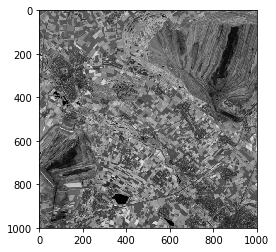

In [7]:
run scripts/ex1_1 imagery/AST_20070501 3

### Covariance matrix of a multispectral image

In [8]:
from osgeo import gdal
from osgeo.gdalconst import GA_ReadOnly

gdal.AllRegister()
infile = 'imagery/AST_20070501'                
inDataset = gdal.Open(infile,GA_ReadOnly)     
cols = inDataset.RasterXSize
rows = inDataset.RasterYSize    

#  data matrix
G = np.zeros((rows*cols,3))                                   
for b in range(3):
    band = inDataset.GetRasterBand(b+1)
    tmp = band.ReadAsArray(0,0,cols,rows).ravel()
    G[:,b] = tmp - np.mean(tmp)
    
#  covariance matrix
C = np.mat(G).T*np.mat(G)/(cols*rows-1)  
print C  

[[ 407.13229638  442.18038527  -78.32374081]
 [ 442.18038527  493.57036427 -120.64197555]
 [ -78.32374081 -120.64197555  438.95704379]]


### Eigenvalues and eigenvectors of the covariance matrix

In [9]:
eigenvalues, eigenvectors = np.linalg.eigh(C)
print eigenvalues
print eigenvectors

[  4.77425683 399.58595201 935.2994956 ]
[[-0.73352328  0.22653637 -0.64080018]
 [ 0.67736254  0.16613156 -0.71664517]
 [ 0.05588906  0.95972995  0.27530862]]


In [10]:
U = eigenvectors
print U.T*U

[[ 1.00000000e+00 -5.58769947e-17  6.67125714e-16]
 [-5.58769947e-17  1.00000000e+00  7.62399525e-18]
 [ 6.67125714e-16  7.62399525e-18  1.00000000e+00]]


### Singular value decomposition

In [11]:
import numpy as np
b = np.mat([1,2,3])
# an almost singular matrix
A = b.T*b + np.random.rand(3,3)*0.001
# a symmetric almost singular matrix
A = A + A.T
print 'determinant: %f'%np.linalg.det(A)
# singular value decomposition
U,Lambda,V = np.linalg.svd(A)
print 'Lambda = %s'%str(Lambda)
print 'U = %s'%str(U)
print 'V = %s'%str(V)

determinant: -0.000005
Lambda = [2.80018439e+01 1.07456732e-03 1.53633140e-04]
U = [[-0.26732657 -0.66950267 -0.69303873]
 [-0.5345285  -0.49538344  0.68474413]
 [-0.80175794  0.55349925 -0.2254391 ]]
V = [[-0.26732657 -0.5345285  -0.80175794]
 [-0.66950267 -0.49538344  0.55349925]
 [ 0.69303873 -0.68474413  0.2254391 ]]


### Principal components analysis

In [12]:
run scripts/ex1_2 imagery/AST_20070501 imagery/pca.tif

In [ ]:
run scripts/dispms -f 'imagery/pca.tif' -p [1,2,3] -e 4